<a href="https://colab.research.google.com/github/kridtapon/Williams-Aroon-Momentum/blob/main/Williams_Aroon_Momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.5/527.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00


In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Williams %R
def calculate_williams_r(data, period=14):
    """
    Calculate Williams %R (Williams Percent Range).
    """
    high_max = data['High'].rolling(window=period).max()
    low_min = data['Low'].rolling(window=period).min()
    williams_r = -100 * (high_max - data['Close']) / (high_max - low_min)
    return williams_r

# Function to calculate Aroon Oscillator
def calculate_aroon(data, period=14):
    """
    Calculate Aroon Oscillator.
    """
    aroon_up = (data['High'].rolling(window=period).apply(lambda x: np.argmax(x) + 1) / period) * 100
    aroon_down = (data['Low'].rolling(window=period).apply(lambda x: np.argmin(x) + 1) / period) * 100
    aroon_oscillator = aroon_up - aroon_down
    return aroon_oscillator

# Define the stock symbol and time period
symbol = 'ANET'  # SPY NQ=F BTC-USD ANET NVDA PLTR
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Calculate Williams %R and Aroon Oscillator
df['Williams_R'] = calculate_williams_r(df, period=14)
df['Aroon_Oscillator'] = calculate_aroon(df, period=14)

# Define Entry and Exit signals based on Williams %R and Aroon Oscillator
df['Entry'] = (df['Williams_R'] > -50) & (df['Aroon_Oscillator'] > 0)
df['Exit'] = (df['Williams_R'] < -50) & (df['Aroon_Oscillator'] < 0)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           445029.183189
Total Return [%]                       345.029183
Benchmark Return [%]                   763.853053
Max Gross Exposure [%]                      100.0
Total Fees Paid                      17396.598185
Max Drawdown [%]                        19.405808
Max Drawdown Duration                       146.0
Total Trades                                   36
Total Closed Trades                            35
Total Open Trades                               1
Open Trade PnL                       36130.354536
Win Rate [%]                            62.857143
Best Trade [%]                           38.73719
Worst Trade [%]                        -11.705306
Avg Winning Trade [%]                   10.366459
Avg Losing Trade [%]                    -5.096139


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



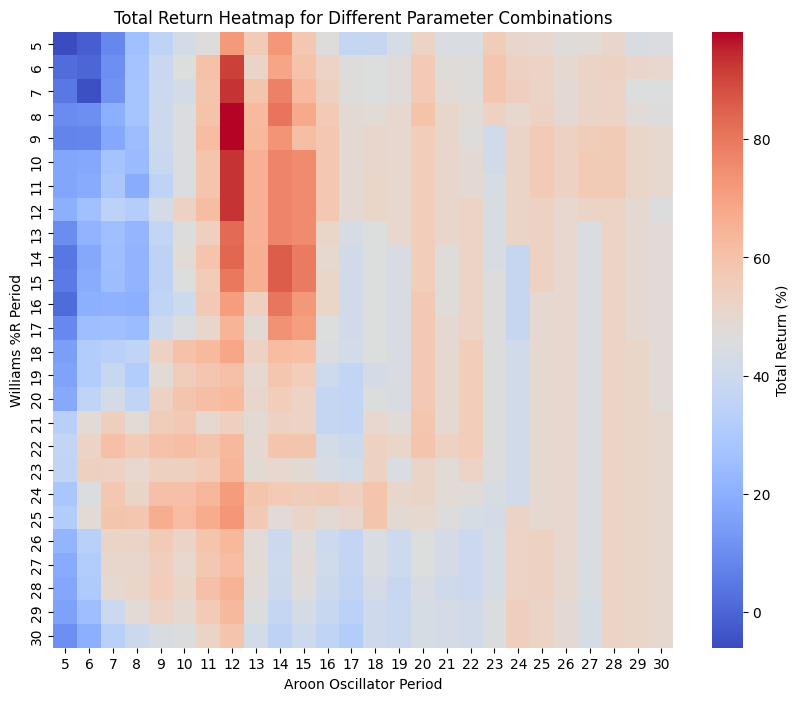

Best Williams %R period: 8
Best Aroon Oscillator period: 12
Best Total Return: 98.16865190577195


/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           198168.651906
Total Return [%]                        98.168652
Benchmark Return [%]                    94.584924
Max Gross Exposure [%]                      100.0
Total Fees Paid                      10251.494836
Max Drawdown [%]                        10.285192
Max Drawdown Duration                       253.0
Total Trades                                   36
Total Closed Trades                            36
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            47.222222
Best Trade [%]                          11.008964
Worst Trade [%]                         -6.324946
Avg Winning Trade [%]                    5.910668
Avg Losing Trade [%]                    -1.469179


In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Williams %R
def calculate_williams_r(data, period=14):
    high_max = data['High'].rolling(window=period).max()
    low_min = data['Low'].rolling(window=period).min()
    williams_r = -100 * (high_max - data['Close']) / (high_max - low_min)
    return williams_r

# Function to calculate Aroon Oscillator
def calculate_aroon(data, period=14):
    aroon_up = (data['High'].rolling(window=period).apply(lambda x: np.argmax(x) + 1) / period) * 100
    aroon_down = (data['Low'].rolling(window=period).apply(lambda x: np.argmin(x) + 1) / period) * 100
    aroon_oscillator = aroon_up - aroon_down
    return aroon_oscillator

# Define the stock symbol and time period
symbol = 'SPY'  # SPY NQ=F BTC-USD ANET NVDA PLTR
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Define the grid search parameters for Williams %R and Aroon Oscillator
williams_periods = range(5, 31)  # Range for Williams %R periods
aroon_periods = range(5, 31)  # Range for Aroon Oscillator periods

# Store results for heatmap
performance_matrix = np.zeros((len(williams_periods), len(aroon_periods)))

# Grid search to optimize the periods
for i, williams_period in enumerate(williams_periods):
    for j, aroon_period in enumerate(aroon_periods):
        # Calculate Williams %R and Aroon Oscillator with current periods
        df['Williams_R'] = calculate_williams_r(df, period=williams_period)
        df['Aroon_Oscillator'] = calculate_aroon(df, period=aroon_period)

        # Define Entry and Exit signals
        df['Entry'] = (df['Williams_R'] > -50) & (df['Aroon_Oscillator'] > 0)
        df['Exit'] = (df['Williams_R'] < -50) & (df['Aroon_Oscillator'] < 0)

        # Filter data for the test period (2020-2025)
        df_filtered = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

        # Backtest using vectorbt
        portfolio = vbt.Portfolio.from_signals(
            close=df_filtered['Close'],
            entries=df_filtered['Entry'],
            exits=df_filtered['Exit'],
            init_cash=100_000,
            fees=0.001
        )

        # Store the total return for the current parameter combination
        performance_matrix[i, j] = portfolio.stats()['Total Return [%]']

# Plot heatmap of total returns for all parameter combinations
plt.figure(figsize=(10, 8))
sns.heatmap(performance_matrix, annot=False, cmap='coolwarm', xticklabels=aroon_periods, yticklabels=williams_periods, cbar_kws={'label': 'Total Return (%)'})
plt.xlabel('Aroon Oscillator Period')
plt.ylabel('Williams %R Period')
plt.title('Total Return Heatmap for Different Parameter Combinations')
plt.show()

# Find the best parameter combination based on the highest total return
best_total_return_idx = np.unravel_index(np.argmax(performance_matrix), performance_matrix.shape)
best_williams_period = williams_periods[best_total_return_idx[0]]
best_aroon_period = aroon_periods[best_total_return_idx[1]]

# Output the best parameters
print(f"Best Williams %R period: {best_williams_period}")
print(f"Best Aroon Oscillator period: {best_aroon_period}")
print(f"Best Total Return: {performance_matrix[best_total_return_idx]}")

# Calculate the final portfolio using the best parameters
df['Williams_R'] = calculate_williams_r(df, period=best_williams_period)
df['Aroon_Oscillator'] = calculate_aroon(df, period=best_aroon_period)
df['Entry'] = (df['Williams_R'] > -50) & (df['Aroon_Oscillator'] > 0)
df['Exit'] = (df['Williams_R'] < -50) & (df['Aroon_Oscillator'] < 0)

# Filter data for the test period (2020-2025)
df_filtered = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt with optimized parameters
portfolio = vbt.Portfolio.from_signals(
    close=df_filtered['Close'],
    entries=df_filtered['Entry'],
    exits=df_filtered['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


In [21]:
# Buy and Hold Performance Metrics
df_holding = df['Close']

# Filter data for the test period (2020-2025)
df_holding = df_holding[(df_holding.index.year >= 2020) & (df_holding.index.year <= 2025)]

pf = vbt.Portfolio.from_holding(df_holding, init_cash=100_000)
pf.stats()

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



,Close
Start,2020-01-02 00:00:00
End,2024-12-31 00:00:00
Period,1258
Start Value,100000.0
End Value,863853.052913
Total Return [%],763.853053
Benchmark Return [%],763.853053
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],38.422773
